## Imports

In [10]:
from selenium import webdriver
from selenium.webdriver.support.ui import Select
from bs4 import BeautifulSoup
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.font_manager import FontProperties

## Open the site with webdriver

In [17]:
#用webdriver.Chrome打開指定網頁
#Cupoy 熱門新聞
Cupoy = 'https://www.cupoy.com/newsfeed/topstory'
browser = webdriver.Chrome(executable_path = './chromedriver')
browser.get(Cupoy)

## Get first 500 posts

In [26]:
category=[]
title=[]
while True:
    #取得當前網頁元素
    soup = BeautifulSoup(browser.page_source, "lxml")
    #定位文章所放的位置
    all_news=soup.find('div',class_="ReactVirtualized__Grid__innerScrollContainer").find_all('div',class_="sc-eEieub sc-iuDHTM ibJqYc")

    #沒有重複的每個category,title都加到空list，以供待會做資料處理
    for i in all_news:
        if i.find('h6',class_='sc-erNlkL sc-ekulBa gTFbZg').text not in title: 
            category.append(i.find('div',class_="sc-gacfCG bPSpUf").text)
            title.append(i.find('h6',class_='sc-erNlkL sc-ekulBa gTFbZg').text)           
            if len(title) == 500: #加上這一步可以精準地控制到500
                break

    if len(title)==500: #當title數==500時，category也會是500，這時就可以結束迴圈
        break        

    #滾輪一次是100，一次模擬他滾5次的動作
    #是動態網頁，文章顯示不會隨著捲動而數量疊加上去
    browser.execute_script("window.scrollBy(0, 500);")


In [27]:
#把剛剛的category,title放到同一個list裡面以方便丟進pandas
category_n_title=[]
for i,o in zip(category,title):
    category_n_title.append([i,o])

In [28]:
#用pandas呈現
columns=['category','title']
data = pd.DataFrame(category_n_title, columns = columns)
pd.set_option('display.max_rows', None)
data

,category,title
0,科技,纏訟三年半定案！宏達電日本子公司遭判侵害日亞化專利權 | TechNews 科技新報
1,國際,川普強調只禁綠卡，將為期兩個月 | TechNews 科技新報
2,科技,運用基地臺訊號技術，提醒簡訊更精準 | TechNews 科技新報
3,蘋果專區,供應商困惑，疫情時蘋果傳告知 iPhone 增產 4% | TechNews 科技新報
4,職場白領,「過得去的」的英文怎麼說？ | 經理人
5,科技,看好產業發展以擴充中期營運資金，友達宣佈完成 325 億元聯貸簽約 | TechNews 科技新報
6,Engadget,Google 開始推送可自訂「嘿 Google」靈敏度的助理更新
7,Engadget,受新冠疫情影響，IFA 2020 將「無法如常開展」
8,Engadget,《集合啦！動物森友會》明天會加入大量新的遊戲內容
9,BuzzOrange 報橘,北韓只要有推候選人都百分百當選！《BBC》揭露超荒謬投票機制 | BuzzOrange


## Group by frequency

In [29]:
#根據類別的出現頻率做一個升降排序
data2 = pd.DataFrame(data.groupby('category').size(),columns=['amounts'])
data2 = data2.sort_values(by = 'amounts',ascending = False)
data3 = data2.reset_index()
data3

,category,amounts
0,育兒,51
1,遊戲情報,30
2,風傳媒 風生活,26
3,科技,23
4,醫療健康,21
5,天下雜誌－投資理財,17
6,理財,17
7,生活空間,17
8,美食,17
9,上報UpMedia,15


## 抽取前10個來做圓餅圖

In [30]:
data3['category'][:10]

0           育兒
1         遊戲情報
2      風傳媒 風生活
3           科技
4         醫療健康
5    天下雜誌－投資理財
6           理財
7         生活空間
8           美食
9    上報UpMedia
Name: category, dtype: object

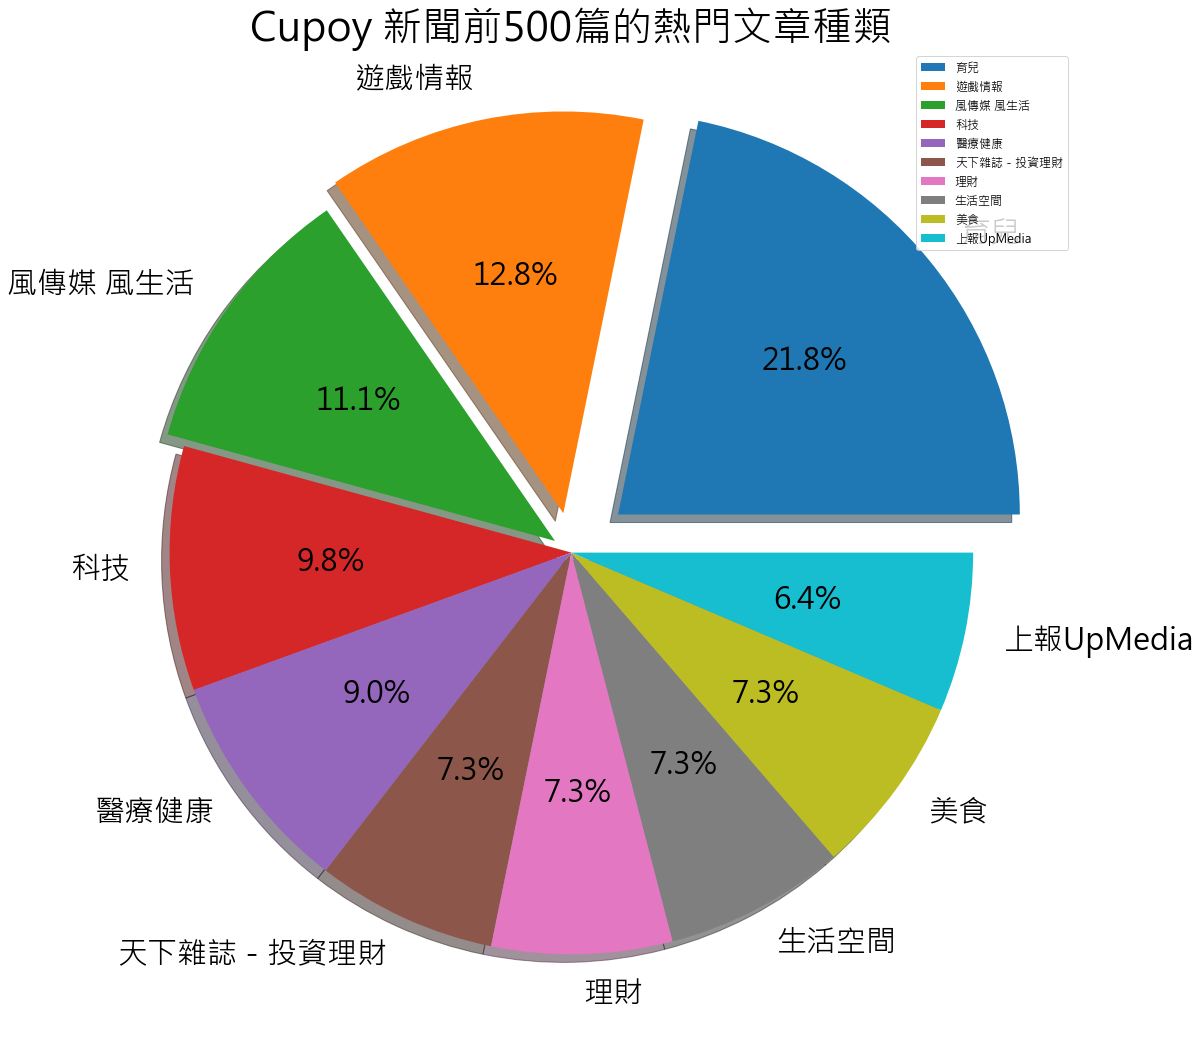

In [31]:
#讓plt可以呈現中文
plt.rcParams['font.sans-serif'] = ['Microsoft JhengHei'] 
plt.rcParams['axes.unicode_minus'] = False

plt.figure(figsize=(18,20)) #圖形大小

labels = data3['category'][:10] #種類名稱
size = data3['amounts'][:10] #數據
explode = [0.15,0.1,0.05,0,0,0,0,0,0,0] #選擇哪些要突出
plt.pie(size,explode= explode, labels = labels, autopct= "%2.1f%%",\
        textprops = {"fontsize":30},shadow=True,startangle=360)
#autopct= "%0.1f%%"小數點前=前面顯示幾格，小數點後顯示幾個數字
plt.title("Cupoy 新聞前500篇的熱門文章種類", {"fontsize" : 40})  # 設定標題及其文字大小
plt.legend(loc = 1,fontsize = 'large') #示意圖的位置，字體大小
plt.show()

## 透過 jieba 等斷詞將文章標題拆解

In [32]:
data['title']

0             纏訟三年半定案！宏達電日本子公司遭判侵害日亞化專利權 | TechNews 科技新報
1                        川普強調只禁綠卡，將為期兩個月 | TechNews 科技新報
2                      運用基地臺訊號技術，提醒簡訊更精準 | TechNews 科技新報
3            供應商困惑，疫情時蘋果傳告知 iPhone 增產 4% | TechNews 科技新報
4                                    「過得去的」的英文怎麼說？ | 經理人
5      看好產業發展以擴充中期營運資金，友達宣佈完成 325 億元聯貸簽約 | TechNews 科技新報
6                       Google 開始推送可自訂「嘿 Google」靈敏度的助理更新
7                             受新冠疫情影響，IFA 2020 將「無法如常開展」
8                               《集合啦！動物森友會》明天會加入大量新的遊戲內容
9            北韓只要有推候選人都百分百當選！《BBC》揭露超荒謬投票機制 | BuzzOrange
10     【用超長棉花棒深入鼻腔底部】美國護理師 PO「武肺病毒採檢圖」勸民眾待在家，網友嚇壞：我不出...
11                              Motorola Edge+ 在發表前被徹底曝光
12     【中國是全球最大的記者監獄】亞洲是違反新聞自由最嚴重地區，無國界記者：網軍靠發送假消息和仇恨...
13     【蔡英文道歉：是我的責任】總統認敦睦艦隊有特殊任務，呼籲給官兵們陳述的機會 | BuzzOr...
14     【網諷：甩鍋到基層】國防部公佈敦睦艦隊防疫破口四大缺失，國防部長自請處分 | BuzzOrange
15     【北韓領導人金正恩病危】8 個可能接班人名單曝光，金正恩妹妹將掀起新一波權力鬥爭？ | Bu...
16     【陳時中幫我們補上一堂民主課】從電子手銬到國防部 SOP 檢討，陳時中證明：政府與人民間不是...
17                             

## stop words 過濾

In [34]:
#建一個Filter，把他原本建議的一些stop words 加進來後，再根據結果新增一些stop words 
import jieba
cut=[]
def cutter(number):
    words = jieba.cut(data['title'][number], cut_all=False)
    stop_words=[' ','　','你','在','有','於','也','人','好','’','／','─','…','','-','！','「','」',\
                '、','？','：','｜','】','【','》','《','–','(',')','.','the','of','is',\
                'and','to','in','that','we','for','an','are','by','be','as','on','with',\
                'can','if','from','which','you','it','this','then','at','have','all','not',\
                'one','has','or','that','|','，',',','的','了','和','是','就','都','而','及',\
                '與','著','或','一個','沒有','我們','你們','妳們','他們','她們','是否']
    for i in words: 
        if i not in stop_words:
            cut.append(i)

In [35]:
#cutter 開始斷詞
count=0
for i in range(500):
    cutter(count)
    count+=1

Building prefix dict from the default dictionary ...
Dumping model to file cache /var/folders/7t/1x5g007j02gctr2f3c4_mf_w0000gn/T/jieba.cache
Loading model cost 0.802 seconds.
Prefix dict has been built successfully.


## 計算同樣文字出現的頻率

In [36]:
#用pandas為文字出現的頻率做groupby去看他的總數且做排序
columns=['關鍵字']
df=pd.DataFrame(cut,columns=columns)
df=pd.DataFrame(df.groupby('關鍵字').size(),columns=['amounts'])
df=df.sort_values(by='amounts',ascending=False)
df

,amounts
關鍵字,
旅遊,54
臺,54
媽媽,45
風傳媒,43
網站,43
專屬,42
媽媽經,42
ETtoday,34
疫情,30


## Wordcloud 文字雲

In [37]:
#pandas dataframe轉為dict
df_dict=df.to_dict(orient="dict")

In [38]:
df_dict_done=df_dict['amounts']

In [40]:
from wordcloud import WordCloud

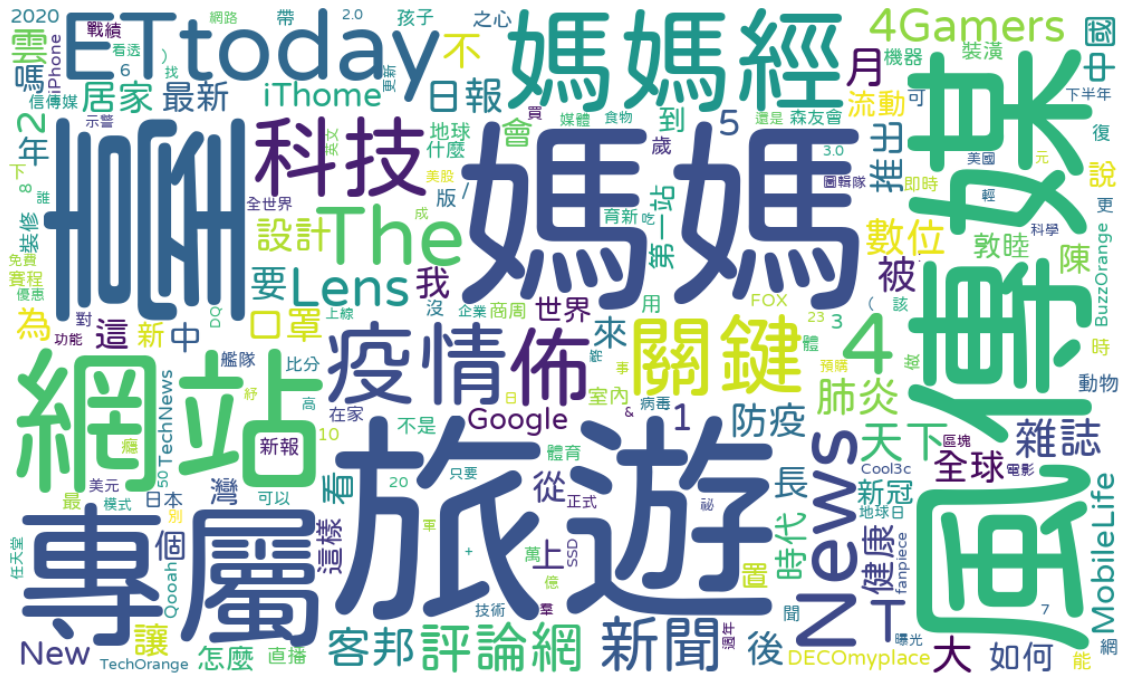

In [45]:
# Chinese fonts must be set
font_path =  'Users/lihengpanza/Documents/字體/open-huninn-font-master/font/jf-openhuninn-1.0.ttf'
 
wc = WordCloud(background_color='white',width=1000, height=600, margin=2,font_path= font_path,random_state=None)
wc.generate_from_frequencies(df_dict_done)
plt.figure(figsize=(20,20))
plt.imshow(wc,interpolation='bilinear')
plt.axis("off")
plt.show()